0     NaN
1     2.0
2     2.0
3     2.0
4     2.0
5     NaN
6     1.0
7     3.0
8     2.0
9     2.0
10    1.0
11    NaN
12    3.0
13    2.0
14    2.0
15    1.0
16    1.0
17    3.0
18    1.0
19    NaN
20    4.0
21    3.0
22    1.0
23    1.0
24    2.0
25    3.0
26    1.0
27    1.0
28    NaN
29    2.0
30    2.0
31    1.0
32    1.0
33    3.0
34    1.0
35    2.0
Name: jumlah, dtype: float64


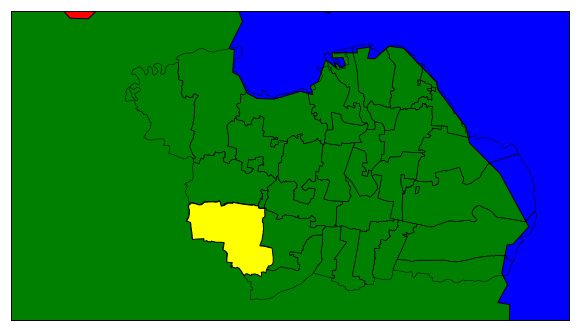

In [2]:
import matplotlib.pyplot as plt
from numpy import array
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import pandas as pd

fig = plt.figure(1, figsize=(10,25))
#fig = plt.figure()
ax = fig.add_subplot(111)

lon_min, lon_max = 112.51338, 112.872205
lat_min, lat_max = -7.357448, -7.178877

map = Basemap(llcrnrlat=lat_min,
              urcrnrlat=lat_max,
              llcrnrlon=lon_min,
              urcrnrlon=lon_max,
              resolution='h',
              projection='tmerc',
              lat_0 = -7.1,
              lon_0 = 112.6,
              epsg=2389)

map.drawmapboundary(fill_color='blue')
map.fillcontinents(color='green',lake_color='red')
map.drawcoastlines()

map.readshapefile('Kec_Surabaya_2017', 'Kec_Surabaya_2017')

pg = []
kec = []

#(use "r" before the path string to address special character, such as '\'). Don't forget to put the file name at the end of the path + '.xlsx'
df = pd.read_excel (r'C:\Users\Adam Adi Prayogo\Documents\sids2\shape\data.xlsx', usecols=['puskesmas', 'jumlah'])
    
    
for info, shape in zip(map.Kec_Surabaya_2017_info, map.Kec_Surabaya_2017):
    if (info['name'] == 'Lakarsantri'):
        print (df['jumlah'])
        if(df['jumlah'][34] == 0):
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='red', edgecolor='k', linewidths=1, zorder=2))
        elif((df['jumlah'][34] > 0) and (df['jumlah'][34] <= 3)):
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='Yellow', edgecolor='k', linewidths=1, zorder=2))
        elif((df['jumlah'][34] > 3) and (df['jumlah'][34] <= 4)):
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='Green', edgecolor='k', linewidths=1, zorder=2))
        else:
            pg.append(Polygon(array(shape), True))
            ax.add_collection(PatchCollection(pg, facecolor='Blue', edgecolor='k', linewidths=1, zorder=2))
    
    
    
#ax.add_collection(PatchCollection(pg, facecolor='green', edgecolor='k', linewidths=1, zorder=2))
plt.show()